In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

In [120]:
import numpy as np

In [121]:
train_data=pd.read_csv(r"C:\Users\user\Desktop\NLP\Corona_NLP_train.csv")
test_data=pd.read_csv(r"C:\Users\user\Desktop\NLP\Corona_NLP_test.csv")

In [122]:
print(train_data.head(10))

   UserName  ScreenName                  Location     TweetAt  \
0      3799       48751                    London  16-03-2020   
1      3800       48752                        UK  16-03-2020   
2      3801       48753                 Vagabonds  16-03-2020   
3      3802       48754                       NaN  16-03-2020   
4      3803       48755                       NaN  16-03-2020   
5      3804       48756  ÜT: 36.319708,-82.363649  16-03-2020   
6      3805       48757      35.926541,-78.753267  16-03-2020   
7      3806       48758                   Austria  16-03-2020   
8      3807       48759           Atlanta, GA USA  16-03-2020   
9      3808       48760          BHAVNAGAR,GUJRAT  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...       

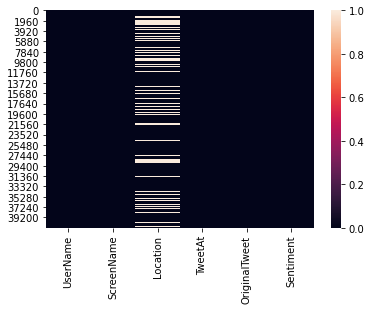

In [123]:
# check for null value in train_data
sns.heatmap(train_data.isnull());

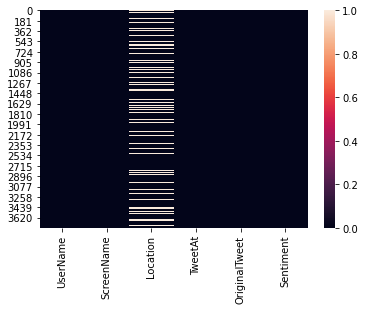

In [124]:
# check for null values in test data
sns.heatmap(test_data.isnull());

In [125]:
train_data[['Location','OriginalTweet','Sentiment']].head(10)

,Location,OriginalTweet,Sentiment
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,My food stock is not the only one which is emp...,Positive
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,"ÜT: 36.319708,-82.363649",As news of the regions first confirmed COVID-...,Positive
6,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...,Positive
7,Austria,Was at the supermarket today. Didn't buy toile...,Neutral
8,"Atlanta, GA USA",Due to COVID-19 our retail store and classroom...,Positive
9,"BHAVNAGAR,GUJRAT","For corona prevention,we should stop to buy th...",Negative


In [126]:
#Drop duplicate and N?A values
train_data.drop_duplicates(inplace= True)
test_data.drop_duplicates(inplace=True)

In [127]:
train_data.fillna(0)
test_data.fillna(0)
train_data.replace(np.nan, 0)
test_data.replace(np.nan, 0)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,0,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,0,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


### Making a check point 

In [129]:
# copy the dataset into new data
train_df = train_data.copy()
test_df = test_data.copy()

### Check if there's any null value exist now.

In [131]:
print(train_df.isnull().sum())
print("*"*50)
print(test_df.isnull().sum())

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64
**************************************************
UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

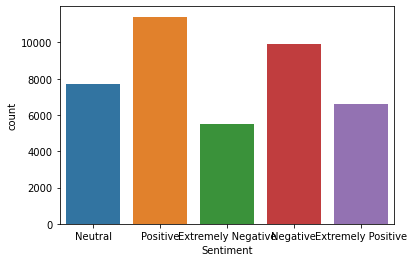

In [132]:
sns.countplot(train_df['Sentiment'])

In [133]:
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 'positive'
    elif sentiment == "Extremely Negative":
        return 'negative'
    elif sentiment == "Positive":
        return 'positive'
    elif sentiment == "Negative":
        return 'negative'
    else:
        return 'netural'

In [134]:
train_df['Sentiment'] = train_df['Sentiment'].apply(lambda x: change_sen(x))
test_df['Sentiment'] = test_df['Sentiment'].apply(lambda x: change_sen(x))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

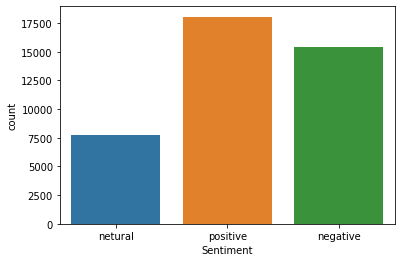

In [135]:
sns.countplot(train_df['Sentiment'])

### Data Cleaning and pre-processing

In [136]:
# load stop words
stop_word = stopwords.words('english')

In [137]:
def clean(text):

    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    #text = re.sub(r'#\w+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])
    
      
    return text

In [138]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: clean(x))
test_df['OriginalTweet'] = test_df['OriginalTweet'].apply(lambda x: clean(x))

In [139]:
print(train_df['Location'])

0                              London
1                                  UK
2                           Vagabonds
3                                 NaN
4                                 NaN
                     ...             
41152    Wellington City, New Zealand
41153                             NaN
41154                             NaN
41155                             NaN
41156    i love you so much || he/him
Name: Location, Length: 41157, dtype: object


In [140]:
import text2emotion as te


In [141]:
a=te.get_emotion("This is worth reading! Hopefully if nothing else the public might wish to consider shopping more locally in the future. That is of course if shops like us survive!")
print(a)

{'Happy': 0.0, 'Angry': 0.33, 'Surprise': 0.0, 'Sad': 0.33, 'Fear': 0.33}


In [142]:
print(a)
big=float(a["Happy"])
label='Happy'
for x,y in a.items():
    if float(y)>big:
        big=float(y)
        label=x
print(label)

    

{'Happy': 0.0, 'Angry': 0.33, 'Surprise': 0.0, 'Sad': 0.33, 'Fear': 0.33}
Angry


In [143]:
print(train_data.head(1))

   UserName  ScreenName Location     TweetAt  \
0      3799       48751   London  16-03-2020   

                                       OriginalTweet Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  


In [144]:
# lst=[]
# for i in range(len(train_df)):
#     text= train_df.iloc[i,4]
#     a=te.get_emotion(text)
#     big=float(a["Happy"])
#     label='Happy'
#     for x,y in a.items():
#         if float(y)>big:
#             big=float(y)
#             label=x
#     lst.append(label)
# df.train_df["Label"]=train_df["Label"].replace(lst)
    

In [145]:
train_df[['Location','OriginalTweet','Sentiment']].head(10)
#test_df[['Location','OriginalTweet','Sentiment']]

,Location,OriginalTweet,Sentiment
0,London,,netural
1,UK,advice Talk neighbours family exchange phone n...,positive
2,Vagabonds,Coronavirus Australia: Woolworths give elderly...,positive
3,NaN,"My food stock one empty... PLEASE, panic, THER...",positive
4,NaN,"Me, ready go supermarket #COVID outbreak. Not ...",negative
5,"ÜT: 36.319708,-82.363649",As news regions first confirmed COVID- case c...,positive
6,"35.926541,-78.753267",Cashier grocery store sharing insights #Covid_...,positive
7,Austria,Was supermarket today. Didn't buy toilet paper...,netural
8,"Atlanta, GA USA",Due COVID- retail store classroom Atlanta open...,positive
9,"BHAVNAGAR,GUJRAT","For corona prevention,we stop buy things cash ...",negative


## Exploratory Data Analysis

In [146]:
python -m pip install wordcloud

SyntaxError: invalid syntax (Temp/ipykernel_272/829664787.py, line 1)

In [147]:
#Visulaize the freequent words

all_words=" ".join([sentence for sentence in train_df['OriginalTweet']])

from wordcloud import WordCloud
wordcloud= WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all-words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [156]:
#display hashtags for the poitive and negative tweets
def hashtag_extraxct(tweets):
    hashtags=[]
    # loop words in the tweet
    #print(tweets)
    for tweet in tweets:
        ht= re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [177]:
#extracting hashtags from positive tweets
ht_positive=hashtag_extraxct(train_df['OriginalTweet'][train_df['Sentiment']=='positive'])
#extracting hashtags from positive tweets
ht_negative=hashtag_extraxct(train_df['OriginalTweet'][train_df['Sentiment']=='negative'])

In [178]:
ht_positive

[[],
 [],
 ['COVID',
  'COVID_',
  'COVID',
  'coronavirus',
  'confinement',
  'Confinementotal',
  'ConfinementGeneral'],
 [],
 ['Covid_'],
 [],
 [],
 ['horningsea'],
 ['CoronaVirus'],
 [],
 ['coronavirus', 'covid'],
 [],
 [],
 ['COVID',
  'Trials',
  'Monthly',
  'Yearly',
  'Prices',
  'Subscriptions',
  'bestiptv',
  'iptv',
  'Service',
  'Iptv',
  'iptvdeals',
  'Cheap',
  'ipTV',
  'Football',
  'HD',
  'Movies',
  'Adult',
  'Cinema',
  'hotmovies',
  'iptvnew',
  'iptv',
  'Adult'],
 ['COVID',
  'Trials',
  'Monthly',
  'Yearly',
  'Prices',
  'Subscriptions',
  'bestiptv',
  'iptv',
  'Service',
  'Iptv',
  'iptvdeals',
  'Cheap',
  'ipTV',
  'Football',
  'HD',
  'Movies',
  'Adult',
  'Cinema',
  'hotmovies',
  'ipTv'],
 ['consumer', 'covid', 'tracker'],
 ['BreakingNews',
  'Breaking',
  'Coronavirus',
  'CoronavirusOutbreak',
  'COVID',
  'COVID',
  'COVID_',
  'COVID',
  'Collapse'],
 ['CoronavirusOutbreak', 'coronavirus', 'COVID'],
 [],
 ['COVID'],
 ['CoronavirusOutbrea

In [179]:
#Combine all into asingle list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [180]:
ht_positive[:5]

['COVID', 'COVID_', 'COVID', 'coronavirus', 'confinement']

In [181]:
freq = nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag': list(freq.keys()),
               'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,COVID,2991
1,COVID_,71
2,coronavirus,5567
3,confinement,4
4,Confinementotal,1


<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

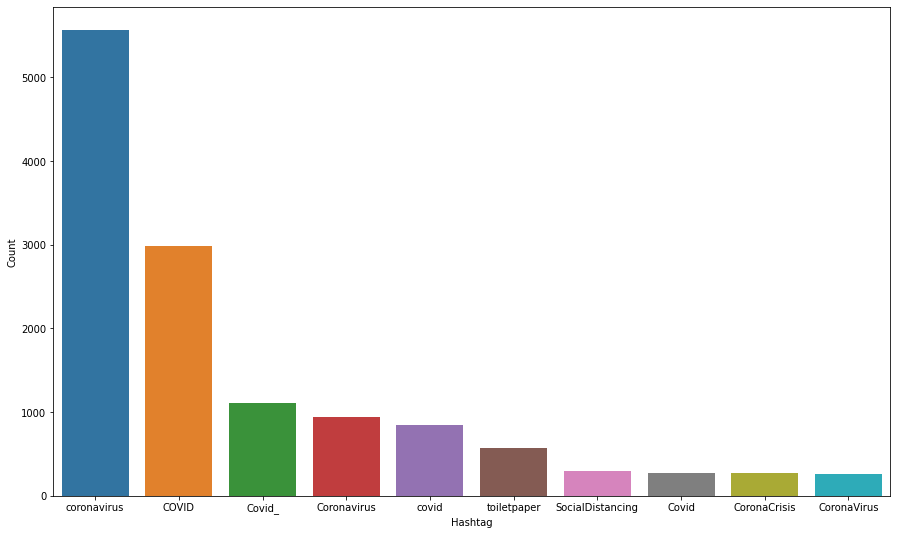

In [182]:
#select top 10 hashtags

d=d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')

In [186]:
ht_negative[:5]
freq = nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag': list(freq.keys()),
               'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,COVID,2372
1,coronavirus,4702
2,CoronavirusFrance,1
3,restezchezvous,1
4,StayAtHome,94


<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

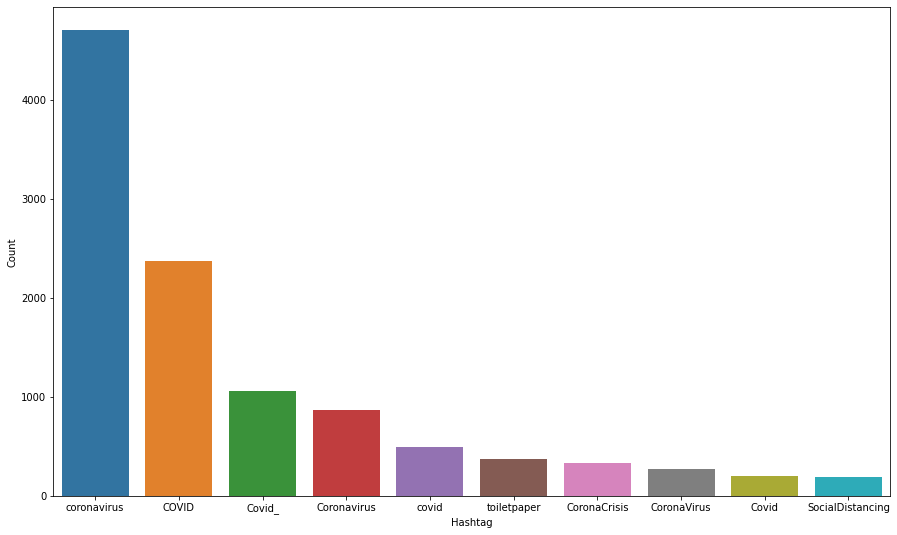

In [187]:
#select top 10 hashtags

d=d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english')
bow = bow_vectorizer.fit_transform(train_df['OriginalTweet'])

In [203]:
#bow[1].toarray()


In [204]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(bow, train_df['Sentiment'], random_state=42, test_size=0.25 )

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [211]:
#training
model = LogisticRegression()
model.fit(x_train, y_train)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [217]:
#testing
#pred = model.predict(x_test)
#f1_score(y_test, pred)

In [216]:
accuracy_score(y_test, pred)

0.7692905733722061

In [222]:
from sklearn import svm
model=svm.SVC()

In [226]:
model.fit(x_train, y_train)

SVC()

In [225]:
accuracy_score(y_test, pred)

0.7692905733722061